In [5]:

### Imports go here
import tweepy
# !pip3 install twint
#import twint
import json 
import datetime
#import geocoder
from tweepy import OAuthHandler
import csv

In [27]:
# load/read from file using JSON
secrets = json.loads(open("secrets_Motorola.json","r").read())

api_key = secrets['CONSUMER_KEY']
api_key_secret = secrets['CONSUMER_SECRET']
access_key = secrets['ACCESS_TOKEN_KEY']
access_key_secret = secrets['ACCESS_TOKEN_SECRET']


auth = OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_key, access_key_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

#change per brand
screen_name = "Moto_Support"

In [31]:
import csv
csvFile = open('tweet_reply_Motorola.csv', 'w')
counter=0

csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q='@Moto_Support',count=4000000,lang="en", tweet_mode='extended').items(4000):
    print (tweet.full_text)
    csvWriter.writerow([tweet.full_text.encode('utf-8')])
counter+=1

csvFile.close()

We have been waiting for too long.... This is unfair @motorolaindia @Moto_Support
When are you releasing kernel source for Moto G 5G ? Its been too long @motorolaindia @Moto_Support
@motorolaindia @Moto_Support How do we get the Spotify Premium Offer with Motorola XZ2 TV ?
@Moto_Support Hi Bramha, Hope you and your family well and safe. Can you let us know when Android 11 will receive to Moto g 5g users in India?
It will never cease to amaze me how @Moto @Moto_Support can ship something from another state at 8pm and @UPS can deliver it at 9am. Happens everytime I get a new device. #LoyalCustomer #MindBlown Thank you!  #HappyCustomer
@DineshKHIVSAR @Flipkart @flipkartsupport File a case on this fraudkart #fraudkart is your new name @rajneeeshkumar @flipkartsupport @_Kalyan_K @aajtak @walmartindia @Moto_Support @HisenseGlobal @askjeevesdotcom @BJP4India @dhanyarajendran
@Moto_Support still waiting for a reply to my DM
@Moto_Support Already mailed..pls check
@Moto @motorolaindia @Moto_Sup

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('tweet_reply_Motorola.csv')  
df.to_csv('analyze_tweet_reply_Motorola.csv', header = ['Comments'])

In [10]:
df1 = pd.read_csv('analyze_tweet_reply_Motorola.csv')
df1.shape

(63, 2)

In [11]:
import re
import string

def clean_text(text):
  text = re.sub('@[\w]*','',text)
  text = re.sub('\[.*?\]','',text)
  text = re.sub('[%s]'% re.escape(string.punctuation), '',text)
  text = re.sub('\w*\d\w*','',text)
  text= re.sub(r'@[A-Za-z0-9]+','',text) 
  text = re.sub('https?://[A-Za-z0-9./]+','',text) 
  text = re.sub('b\w*','',text)
  return text

cleaned = lambda x: clean_text(x)

In [12]:
df1['Comments']= pd.DataFrame(df1.Comments.apply(cleaned))

In [13]:
df1

,Unnamed: 0,Comments
0,0,are you releasing kernel source for Moto G ...
1,1,How do we get the Spotify Premium Offer with...
2,2,Hi Bramha Hope you and your family well and s...
3,3,will never cease to amaze me how can ship s...
4,4,File a case on this fraudkart fraudkart is ...
...,...,...
58,58,Dear n nnWhen You are Going to launch in In...
59,59,Dear n nnWhen You are Going to launch in In...
60,60,Dear n nnWhen You are Going to launch in In...
61,61,n nnWhen You are Going to launch in India C...


In [14]:
df1 = df1.drop(["Unnamed: 0"], axis=1)
df1

,Comments
0,are you releasing kernel source for Moto G ...
1,How do we get the Spotify Premium Offer with...
2,Hi Bramha Hope you and your family well and s...
3,will never cease to amaze me how can ship s...
4,File a case on this fraudkart fraudkart is ...
...,...
58,Dear n nnWhen You are Going to launch in In...
59,Dear n nnWhen You are Going to launch in In...
60,Dear n nnWhen You are Going to launch in In...
61,n nnWhen You are Going to launch in India C...


In [45]:
!pip install textblob

In [15]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

df1['TBpolarity'] = df1['Comments'].apply(get_polarity)

In [17]:
df1

,Comments,TBpolarity
0,are you releasing kernel source for Moto G ...,-0.050000
1,How do we get the Spotify Premium Offer with...,0.000000
2,Hi Bramha Hope you and your family well and s...,0.500000
3,will never cease to amaze me how can ship s...,0.136364
4,File a case on this fraudkart fraudkart is ...,0.136364
...,...,...
58,Dear n nnWhen You are Going to launch in In...,0.000000
59,Dear n nnWhen You are Going to launch in In...,0.000000
60,Dear n nnWhen You are Going to launch in In...,0.000000
61,n nnWhen You are Going to launch in India C...,0.000000


In [18]:
df1['Sentiment_type']= ''
df1.loc[df1.TBpolarity>0, 'Sentiment_type']='POSITIVE'
df1.loc[df1.TBpolarity==0, 'Sentiment_type']='NEUTRAL '
df1.loc[df1.TBpolarity<0, 'Sentiment_type']='NEGATIVE'
df1.head()

,Comments,TBpolarity,Sentiment_type
0,are you releasing kernel source for Moto G ...,-0.050000,NEGATIVE
1,How do we get the Spotify Premium Offer with...,0.000000,NEUTRAL
2,Hi Bramha Hope you and your family well and s...,0.500000,POSITIVE
3,will never cease to amaze me how can ship s...,0.136364,POSITIVE
4,File a case on this fraudkart fraudkart is ...,0.136364,POSITIVE


In [19]:
df1 = df1.drop_duplicates()

In [20]:
df1.shape

(59, 3)

In [21]:
df1['Sentiment_type'].value_counts()

NEUTRAL     32
POSITIVE    16
NEGATIVE    11
Name: Sentiment_type, dtype: int64

In [22]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

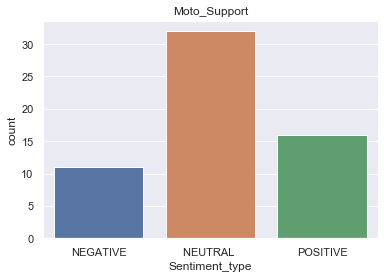

In [23]:
sns.countplot(x ='Sentiment_type',data = df1).set_title('Moto_Support')
plt.show()

In [3]:
# Wordcloud libraries and Tweepy API
import sys
import string
import json
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import tweepy
from tweepy import OAuthHandler
from tweepy import Cursor

In [2]:
!pip install wordcloud

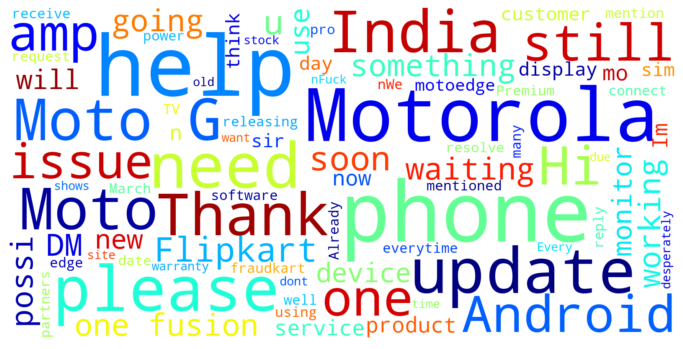

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(df1['Comments'])